In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.10.1'

In [45]:
import tensorflow_hub as hub
hub.__version__
if tf.config.list_physical_devices("GPU"):
    print('available')
else:
    print('not')

available


In [47]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


<h1>Actual Code<h1>

In [6]:
import pandas as pd

In [7]:
lables_csv = pd.read_csv('./Dog_Breed/labels.csv')
lables_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


<Axes: xlabel='breed'>

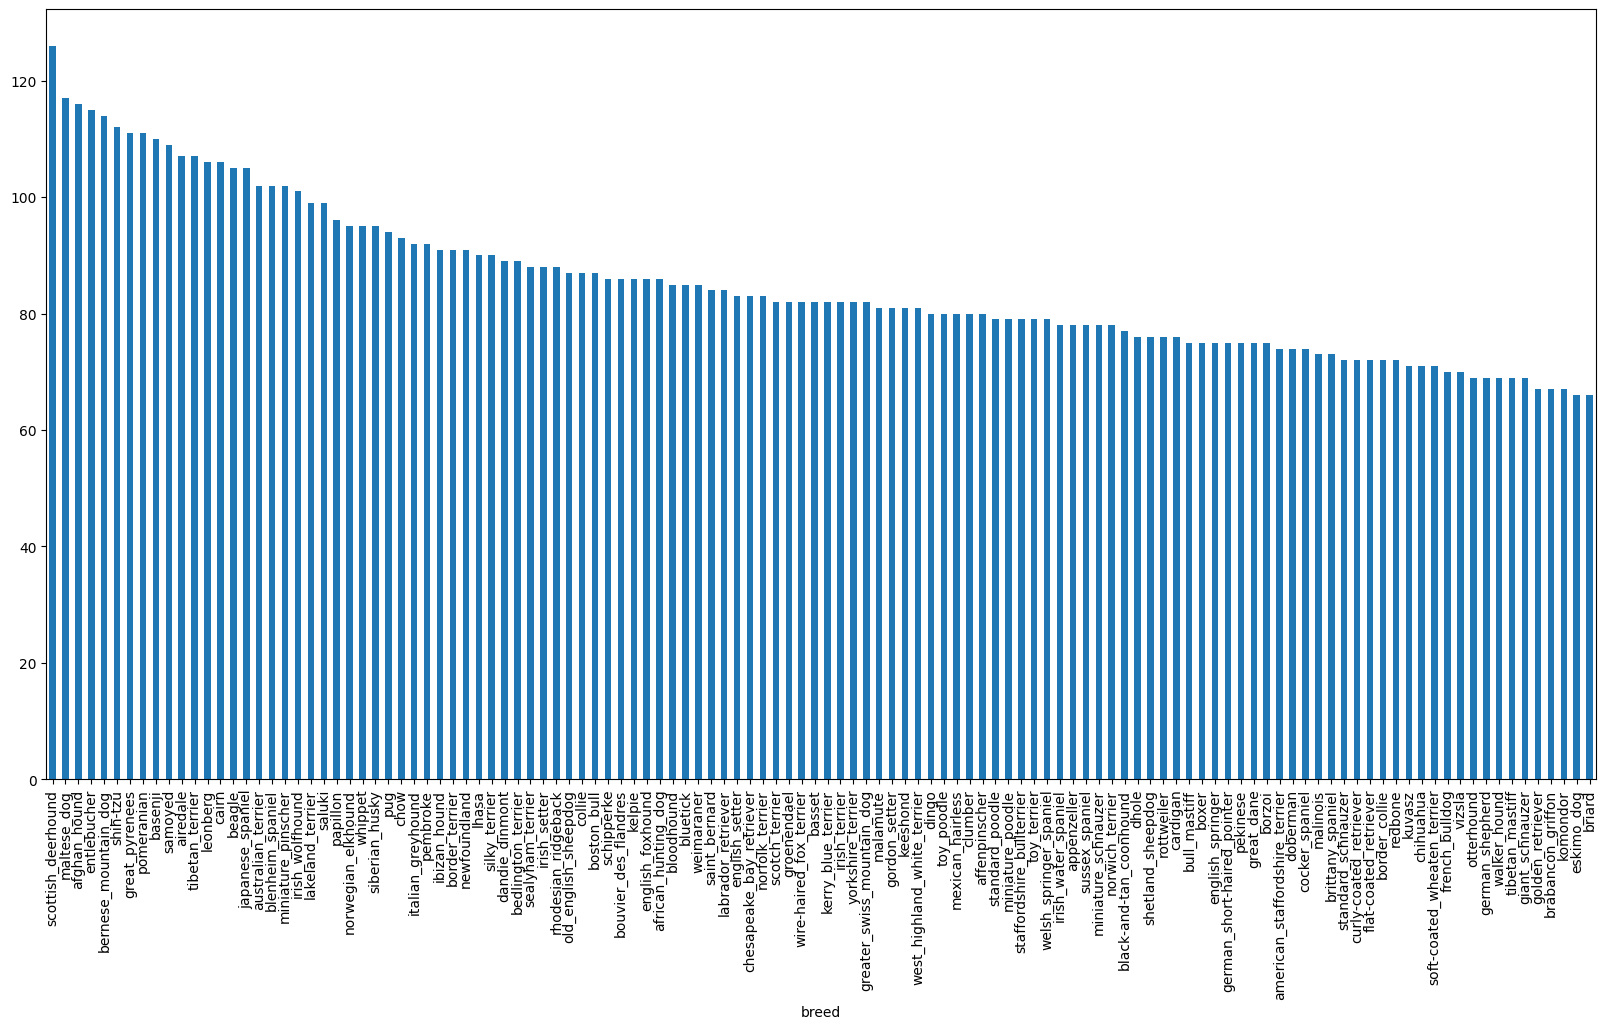

In [8]:
lables_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [9]:
lables_csv["breed"].value_counts().median()

82.0

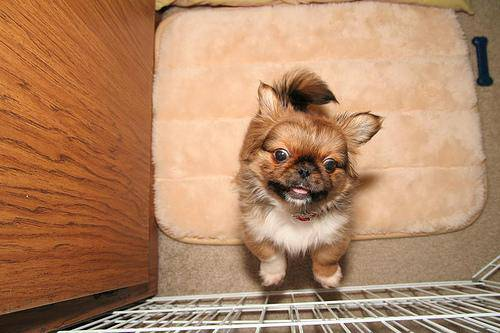

In [10]:
from IPython.display import Image
Image('Dog_Breed/test/200364801b15793809948e0b2a08567e.jpg')

In [11]:
ls = ['./Dog_Breed/train/'+fname+'.jpg' for fname in lables_csv["id"]]
ls

['./Dog_Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './Dog_Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './Dog_Breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 './Dog_Breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 './Dog_Breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 './Dog_Breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 './Dog_Breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 './Dog_Breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 './Dog_Breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 './Dog_Breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 './Dog_Breed/train/004396df1acd0f1247b740ca2b14616e.jpg',
 './Dog_Breed/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 './Dog_Breed/train/00693b8bc2470375cc744a6391d397ec.jpg',
 './Dog_Breed/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 './Dog_Breed/train/0075dc49dab4024d12fafe67074d8a81.jpg',
 './Dog_Breed/train/00792e341f3c6eb33663e415d0715370.jpg',
 './Dog_Breed/train/007b5a16db9d9ff9d7ad39982703e429.jpg

In [12]:
import numpy as np
lables = lables_csv["breed"]
lables = np.array(lables)
unq_lables = np.unique(lables)
unq_lables

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [13]:
print(lables[0])
print(lables[0]==unq_lables)

boston_bull
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [14]:
bool_lables = [lable == unq_lables for lable in lables]
bool_lables[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [15]:
len(bool_lables)

10222

In [89]:
X = ls
Y = bool_lables

In [90]:
from matplotlib.pyplot import imread
img = imread('./Dog_Breed/train/20030cc0f391fcf7f7141da5136f12c2.jpg')
#img

In [63]:
from matplotlib.pyplot import imread
img = imread(ls[20])
img

array([[[127, 128, 120],
        [123, 124, 116],
        [117, 120, 111],
        ...,
        [ 98, 123,  65],
        [ 97, 122,  64],
        [102, 127,  69]],

       [[117, 120, 111],
        [114, 117, 108],
        [112, 115, 106],
        ...,
        [ 97, 123,  62],
        [ 94, 119,  61],
        [ 98, 124,  63]],

       [[113, 118, 111],
        [111, 116, 109],
        [111, 116, 109],
        ...,
        [ 94, 120,  57],
        [ 90, 116,  55],
        [ 92, 118,  55]],

       ...,

       [[228, 227, 225],
        [231, 230, 228],
        [233, 227, 229],
        ...,
        [219, 214, 211],
        [202, 197, 194],
        [190, 185, 182]],

       [[221, 220, 218],
        [234, 233, 231],
        [243, 237, 239],
        ...,
        [222, 217, 214],
        [220, 215, 212],
        [217, 212, 209]],

       [[239, 238, 236],
        [236, 235, 233],
        [227, 221, 223],
        ...,
        [208, 203, 200],
        [216, 211, 208],
        [215, 210, 207]]

In [91]:
tf.constant(img)

<tf.Tensor: shape=(240, 320, 3), dtype=uint8, numpy=
array([[[ 85,  21,   0],
        [101,  39,   0],
        [123,  64,   6],
        ...,
        [189, 151, 106],
        [211, 176, 148],
        [210, 175, 156]],

       [[145,  85,  33],
        [157, 101,  50],
        [174, 120,  73],
        ...,
        [206, 166, 130],
        [221, 183, 164],
        [217, 181, 169]],

       [[185, 136, 104],
        [194, 149, 118],
        [207, 163, 134],
        ...,
        [218, 175, 156],
        [225, 184, 180],
        [222, 181, 185]],

       ...,

       [[238, 241, 255],
        [237, 240, 255],
        [237, 240, 255],
        ...,
        [223, 204, 226],
        [225, 203, 226],
        [226, 202, 226]],

       [[239, 240, 255],
        [239, 240, 255],
        [237, 240, 255],
        ...,
        [225, 203, 226],
        [226, 200, 225],
        [226, 200, 225]],

       [[240, 241, 255],
        [239, 240, 255],
        [238, 241, 255],
        ...,
        [225, 201, 22

In [92]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=0.2)

In [93]:
def process_img(pth):
    img = tf.io.read_file(pth)
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.convert_image_dtype(img,tf.float32)
    img = tf.image.resize(img,size=[224,224])
    return img

In [94]:
def get_img_lable(pth,lable):
    img = process_img(pth)
    return img,lable

In [95]:
get_img_lable(X[2],Y[2])


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3918853 , 0.3918853 , 0.36051273],
         [0.43775532, 0.43775532, 0.40638277],
         [0.44351017, 0.44351017, 0.41213763],
         ...,
         [0.05796662, 0.02239764, 0.01937653],
         [0.05252095, 0.0470589 , 0.04978992],
         [0.04586835, 0.05371149, 0.04978992]],
 
        [[0.38653433, 0.38261276, 0.3630049 ],
         [0.4161569 , 0.41223532, 0.39262748],
         [0.43315482, 0.42923325, 0.4096254 ],
         ...,
         [0.0909924 , 0.05177672, 0.04754004],
         [0.03035708, 0.02489503, 0.02762605],
         [0.02370449, 0.03154762, 0.02762605]],
 
        [[0.36859885, 0.36467728, 0.34506944],
         [0.35422263, 0.35030106, 0.33069322],
         [0.39899355, 0.39507198, 0.3754641 ],
         ...,
         [0.2361781 , 0.20233706, 0.19541305],
         [0.04896353, 0.04268564, 0.04582458],
         [0.04459034, 0.04705883, 0.04582458]],
 
        ...,
 
        [[0.7591447 , 0.75522316

In [151]:
BATCH_SIZE = 64
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    if test_data:
        print('creating data')
        data = tf.data.Datasetfrom_tensor_slices((tf.constant(X)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    elif valid_data:
        print('creating data')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) 
        data_batch = data.map(get_img_lable).batch(BATCH_SIZE)
        return data_batch
    else:
        print('creating')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) 
        data = data.shuffle(buffer_size=len(X))
        data = data.map(get_img_lable)
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [152]:
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val,valid_data=True)

creating
creating data


In [153]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [154]:
IMG_SIZE=224

In [155]:
INPUT_SHAPE = [None, IMG_SIZE,IMG_SIZE, 3]
OUTPUT_SHAPE = len(unq_lables)
MODEL_URL = 'https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/140-224-classification/versions/2'

In [156]:
def create_model(input_shape = INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    print("building")
    model = tf.keras.Sequential([hub.KerasLayer(model_url),tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")])
    model.compile(
        loss= tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    model.build(INPUT_SHAPE)
    return model

In [157]:
model = create_model()

building


In [158]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1001)              6158505   
                                                                 
 dense_6 (Dense)             (None, 120)               120240    
                                                                 
Total params: 6,278,745
Trainable params: 120,240
Non-trainable params: 6,158,505
_________________________________________________________________


In [160]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=4)

In [161]:
NUM_EPOCHS = 100

In [162]:
def train_model():
    model = create_model()
    model.fit(x=train_data,epochs=NUM_EPOCHS,validation_data=val_data,validation_freq=1,callbacks=[early_stopping])
    return model

In [163]:
model = train_model()

building
Epoch 1/100
128/128 [==============================] - 20s 106ms/step - loss: 1.7250 - accuracy: 0.6011 - val_loss: 0.7365 - val_accuracy: 0.7863
Epoch 2/100
128/128 [==============================] - 12s 94ms/step - loss: 0.4430 - accuracy: 0.8783 - val_loss: 0.6297 - val_accuracy: 0.8108
Epoch 3/100
128/128 [==============================] - 12s 94ms/step - loss: 0.2650 - accuracy: 0.9360 - val_loss: 0.6063 - val_accuracy: 0.8127
Epoch 4/100
128/128 [==============================] - 12s 94ms/step - loss: 0.1765 - accuracy: 0.9664 - val_loss: 0.5945 - val_accuracy: 0.8181
Epoch 5/100
128/128 [==============================] - 12s 93ms/step - loss: 0.1269 - accuracy: 0.9807 - val_loss: 0.6007 - val_accuracy: 0.8225
Epoch 6/100
128/128 [==============================] - 12s 95ms/step - loss: 0.0953 - accuracy: 0.9887 - val_loss: 0.6020 - val_accuracy: 0.8210
Epoch 7/100
128/128 [==============================] - 12s 94ms/step - loss: 0.0749 - accuracy: 0.9924 - val_loss: 0.600

In [164]:
predictions = model.predict(val_data,verbose=1)
predictions

32/32 [==============================] - 4s 82ms/step


array([[4.61783110e-08, 4.17678070e-09, 9.25049264e-08, ...,
        3.11986719e-06, 3.71343995e-05, 1.21663874e-07],
       [5.91909455e-08, 2.10924554e-05, 2.06705479e-07, ...,
        2.47162841e-08, 2.48596677e-09, 7.11844268e-06],
       [2.28276076e-06, 1.25892891e-03, 3.15189845e-06, ...,
        1.14667241e-03, 3.56524950e-04, 1.05266984e-07],
       ...,
       [6.73730725e-08, 8.83929988e-06, 5.06192492e-08, ...,
        2.23513510e-07, 7.13614412e-08, 6.63519927e-07],
       [1.39568412e-09, 2.04698966e-10, 2.32148190e-10, ...,
        1.24090915e-09, 3.61054762e-11, 1.11887632e-09],
       [1.64010398e-05, 4.00143477e-07, 7.77823004e-07, ...,
        2.89073323e-05, 1.59826463e-08, 1.87243501e-08]], dtype=float32)

In [165]:
def get_pred_lable(prediction_probabilities):
    return unq_lables[np.argmax(prediction_probabilities)]
pred_lable = get_pred_lable(predictions[81])
pred_lable

'entlebucher'

In [166]:
images_ = []
lables_ = []

for image,lable in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    lables_.append(unq_lables[np.argmax(lable)])

In [167]:
get_pred_lable(lables_[0])

'affenpinscher'

In [168]:
get_pred_lable(predictions[0])

'toy_terrier'

In [169]:
import matplotlib.pyplot as plt
def plot_pred(prediction_probabilities,lables,images,n=1):
    pred_prob,true_lable,image = prediction_probabilities[n],lables[n],images[n]
    pred_lable = get_pred_lable(pred_prob)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    if(pred_lable==true_lable):
        color = "green"
    else:
        color="red"
    
    plt.title("{}  {:2.0f}%  {}".format(pred_lable,np.max(pred_prob)*100,true_lable),color=color)
    

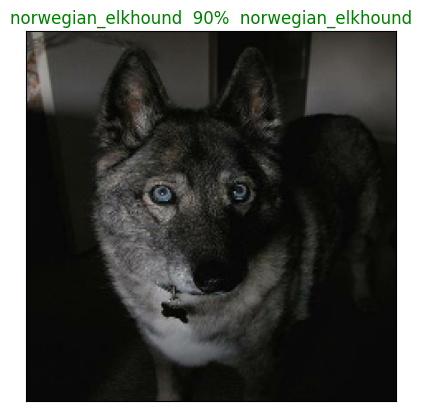

In [179]:
plot_pred(prediction_probabilities=predictions,lables=lables_,images=images_,n=2040)

In [184]:
import os
def save_model(model,suffix=None):
    modeldir = os.path.join("./models")
    model_pth = modeldir + "-" + suffix + ".h5"
    print("saving")
    model.save(model_pth)
    return model_pth

In [185]:
save_model(model,suffix="dogvision")

saving


'./models-dogvision.h5'